# OOI Profiler Notebook

## Methods
I manually downloaded data for the OOI Shelf Surface Piercing Profiler (CE02SHSP), OOI Shelf Surface Mooring (CE02SHSM), and OOI Shelf Benthic Experiment Package (CE02SHBP) from the [OOI Thredds Gold Copy catalog](https://thredds.dataexplorer.oceanobservatories.org/thredds/catalog.html).
For all data sets I downloaded any available data between 2019-06-23 to 2019-07-15.


## Data Analysis

### Common Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics
import datetime
import os

In [2]:
# Find data files.
data_dir = 'C:/Users/Ian/projects/ooi-profiler-investigation/data/CE02SHSP' # Directory where data is located.

files = ['/'.join((data_dir,f)) for f in os.listdir(data_dir)]
acs_files = [file for file in files if 'OPTAA' in file]
velpt_files = [file for file in files if 'VELPT' in file]
dosta_files = [file for file in files if 'DOSTA' in file]
ctd_files = [file for file in files if 'CTDPF' in file]
nutnr_files = [file for file in files if 'NUTNR' in file]
spkir_files = [file for file in files if 'SPKIR' in file]
par_files = [file for file in files if 'PARAD' in file]
flort_files = [file for file in files if 'FLORT' in file]

In [3]:
def import_data(files):
    """
    Files must be a list of absolute path OOI NetCDF files that contain the same data.
    :param files: A list of absolute filepaths.
    :return: A pandas dataframe from the
    """
    df = pd.DataFrame()
    for file in files:
        ds = xr.open_dataset(file)
        df = pd.concat([df,ds.to_dataframe()])
    df.index = df.time
    return df

In [4]:
# Miscellaneous objects.
dtfmt = mdates.DateFormatter('%Y-%m-%dT%H:%M:%SZ') # Date format for xaxis on plots.

# Set up limits.
bdt = datetime.datetime(2019,6,23,0,0,0) #Used to limit the dataset during plotting so it doesn't take forever.
edt = datetime.datetime(2019,6,29,0,0,0)
pbdt = datetime.datetime(2019,6,25,0,0,0)
pedt = datetime.datetime(2019,6,27,3,0,0)

### CTD Data

In [5]:
df = import_data(ctd_files)

In [6]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]
df = df.resample('1S').mean()

Text(0.5, 0, 'Datetime (UTC)')

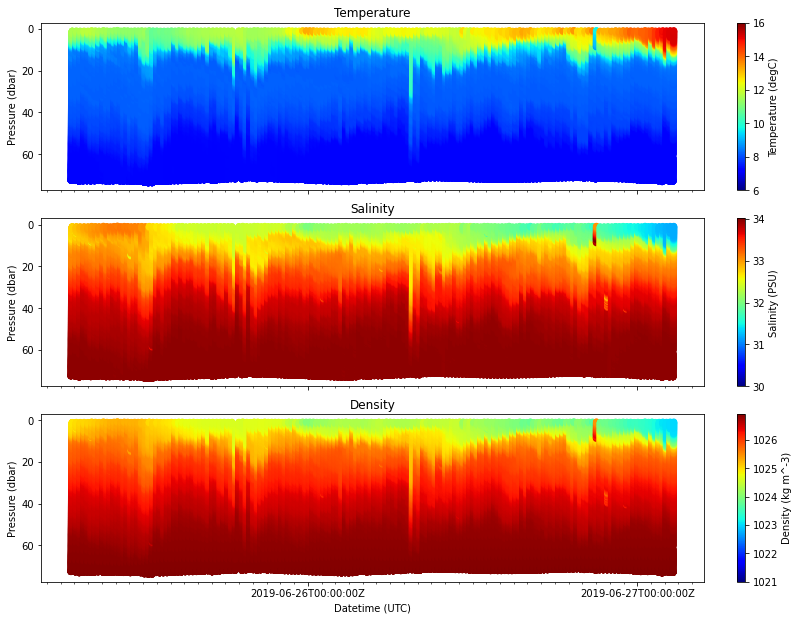

In [7]:
num_plots = 3
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True,sharex = True)
p1 = ax[0].scatter(df.index,df.pressure,c = df.temperature,cmap = 'jet',vmin = 6,vmax = 16)

p2 = ax[1].scatter(df.index,df.pressure,c = df.salinity,cmap = 'jet',vmin = 30)

p3 = ax[2].scatter(df.index,df.pressure,c= df.density,cmap = 'jet',vmin = 1021)

for i in range(num_plots):
    ax[i].invert_yaxis()
    ax[i].set_ylabel('Pressure (dbar)')
    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

cbar1 = plt.colorbar(p1,ax=ax[0])
cbar2 = plt.colorbar(p2,ax=ax[1])
cbar3 = plt.colorbar(p3,ax=ax[2])
cbar1.set_label('Temperature (degC)')
cbar2.set_label('Salinity (PSU)')
cbar3.set_label('Density (kg m^-3)')

ax[0].set_title('Temperature')
ax[1].set_title('Salinity')
ax[2].set_title('Density')

ax[-1].set_xlabel('Datetime (UTC)')

### Fluorometer (FLORT) Data

In [8]:
df = import_data(flort_files)

In [9]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]
df = df.resample('1S').mean()
FLORT_CHL = df

Text(0.5, 0, 'Datetime (UTC)')

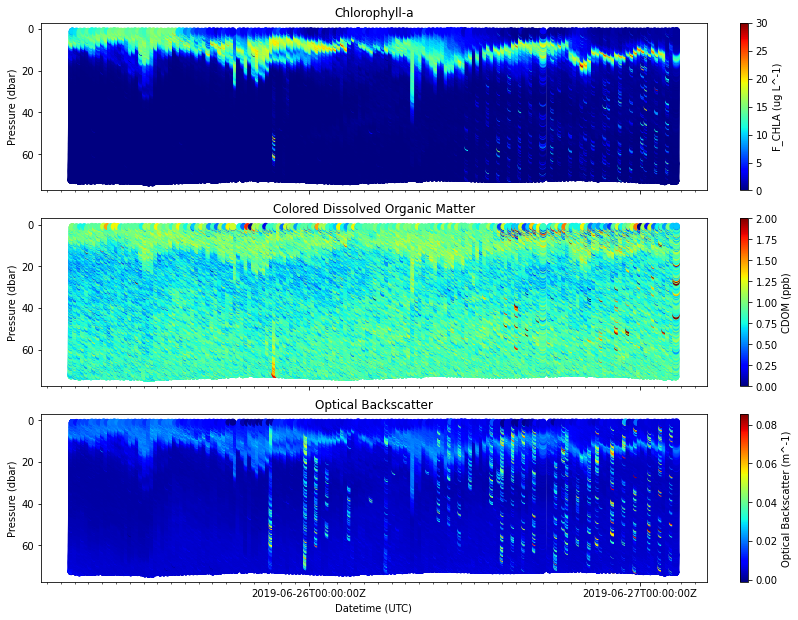

In [10]:
num_plots = 3
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True, sharex = True)
p1 = ax[0].scatter(df.index,df.pressure,c = df.fluorometric_chlorophyll_a,cmap = 'jet',vmin = 0,vmax = 30)

p2 = ax[1].scatter(df.index,df.pressure,c = df.fluorometric_cdom,cmap = 'jet',vmin = 0,vmax = 2)

p3 = ax[2].scatter(df.index,df.pressure,c= df.optical_backscatter,cmap = 'jet')

for i in range(num_plots):
    ax[i].invert_yaxis()
    ax[i].set_ylabel('Pressure (dbar)')

    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

cbar1 = plt.colorbar(p1,ax=ax[0])
cbar2 = plt.colorbar(p2,ax=ax[1])
cbar3 = plt.colorbar(p3,ax=ax[2])
cbar1.set_label('F_CHLA (ug L^-1)')
cbar2.set_label('CDOM (ppb)')
cbar3.set_label('Optical Backscatter (m^-1)')

ax[0].set_title('Chlorophyll-a')
ax[1].set_title('Colored Dissolved Organic Matter')
ax[2].set_title('Optical Backscatter')

ax[-1].set_xlabel('Datetime (UTC)')

### Water Velocity Data (VELPT)

In [11]:
df = import_data(velpt_files)

In [12]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]
df = df[df.pressure >= 5]
df = df.resample('1S').mean()

Text(0.5, 0, 'Datetime (UTC)')

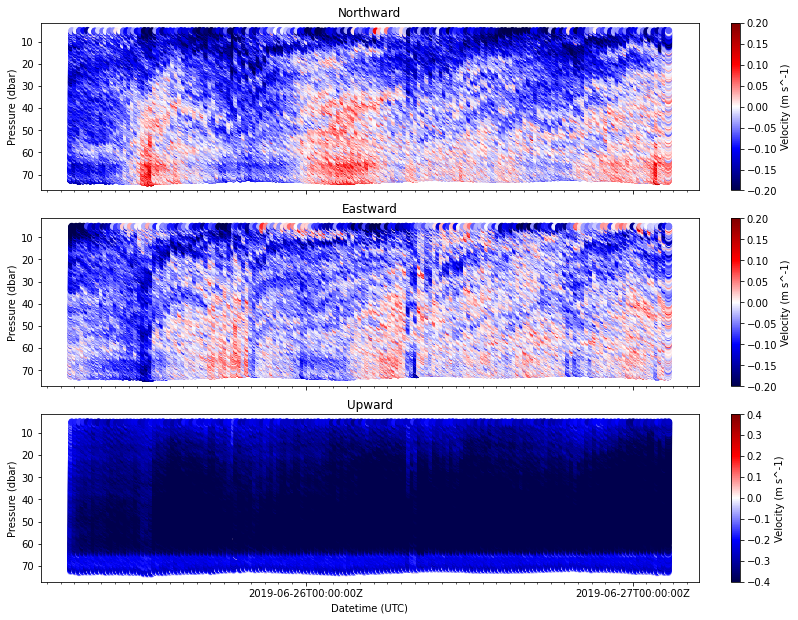

In [13]:
num_plots = 3
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True, sharex = True)
p1 = ax[0].scatter(df.index,df.pressure,c = df.velpt_j_northward_velocity*1000,cmap = 'seismic',vmin = -0.2, vmax = 0.2)

p2 = ax[1].scatter(df.index,df.pressure,c = df.velpt_j_eastward_velocity*1000,cmap = 'seismic',vmin = -0.2, vmax = 0.2)

p3 = ax[2].scatter(df.index,df.pressure,c= df.velpt_j_upward_velocity*1000,cmap = 'seismic',vmin = -0.4, vmax = 0.4)

for i in range(num_plots):
    ax[i].invert_yaxis()
    ax[i].set_ylabel('Pressure (dbar)')
    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

cbar1 = plt.colorbar(p1,ax=ax[0])
cbar2 = plt.colorbar(p2,ax=ax[1])
cbar3 = plt.colorbar(p3,ax=ax[2])
cbar1.set_label('Velocity (m s^-1)')
cbar2.set_label('Velocity (m s^-1)')
cbar3.set_label('Velocity (m s^-1)')

ax[0].set_title('Northward')
ax[1].set_title('Eastward')
ax[2].set_title('Upward')

ax[-1].set_xlabel('Datetime (UTC)')

### PAR Data

In [14]:
df = import_data(par_files)

In [15]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]

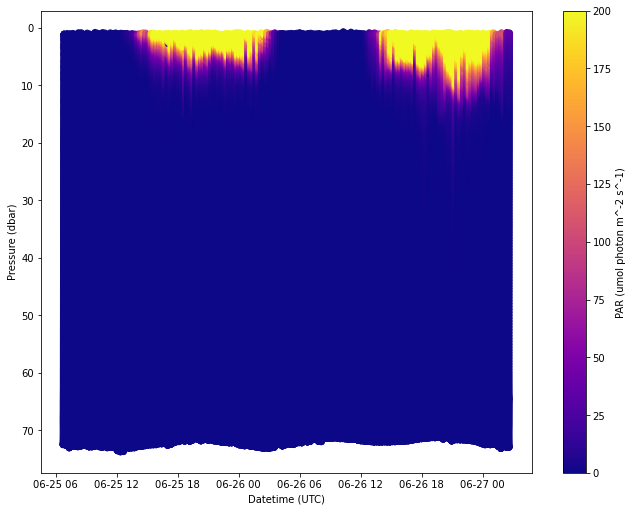

In [16]:
fig = plt.figure(figsize = (11,8.5))
p = plt.scatter(df.index,df.pressure,c = df.parad_j_par_counts_output,cmap = 'plasma', vmin = 0, vmax = 200)
plt.gca().invert_yaxis()
plt.xlabel('Datetime (UTC)')
plt.ylabel('Pressure (dbar)')
cbar = plt.colorbar(p)
cbar.set_label('PAR (umol photon m^-2 s^-1)')

### Nitrate Data

In [17]:
df = import_data(nutnr_files)

In [18]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]
df = df.resample('1S').mean()

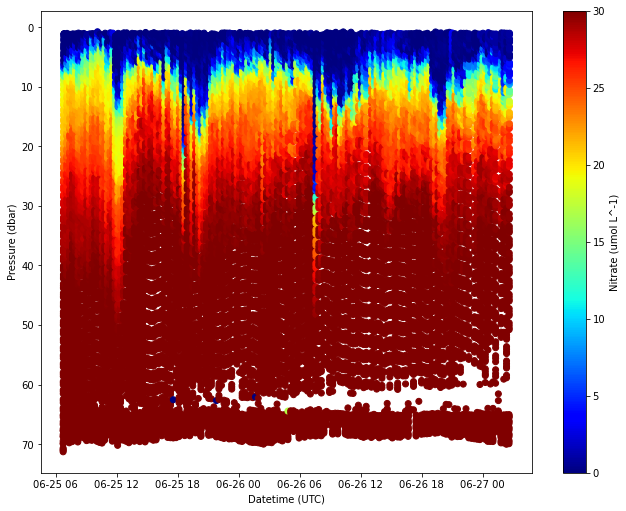

In [19]:
fig = plt.figure(figsize = (11,8.5))
p = plt.scatter(df.index,df.int_ctd_pressure,c = df.salinity_corrected_nitrate,cmap = 'jet',vmin = 0, vmax = 30)
plt.gca().invert_yaxis()
plt.xlabel('Datetime (UTC)')
plt.ylabel('Pressure (dbar)')
cbar = plt.colorbar(p)
cbar.set_label('Nitrate (umol L^-1)')

### Oxygen Data

In [20]:
df = import_data(dosta_files)

In [21]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]
df = df.resample('1S').mean()

Text(0.5, 0, 'Datetime (UTC)')

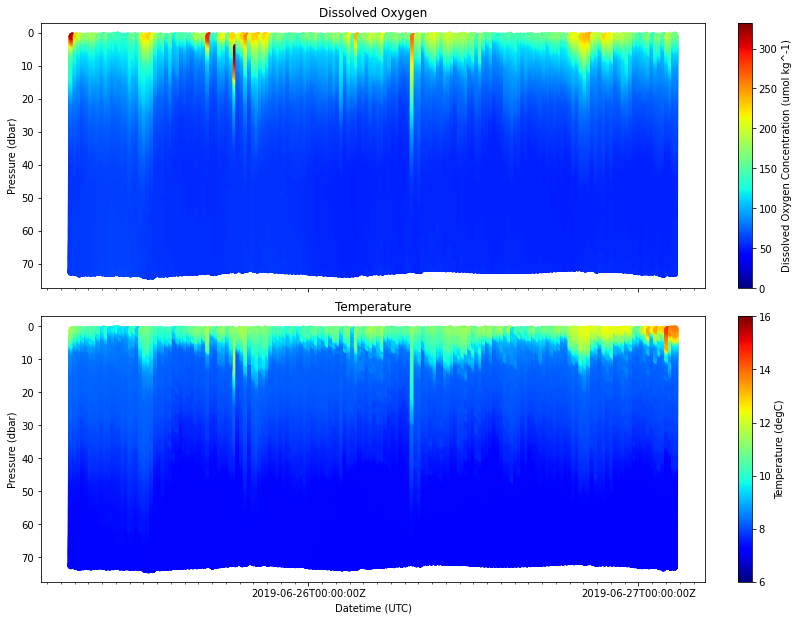

In [22]:
num_plots = 2
fig,ax = plt.subplots(num_plots, 1 ,figsize = (11,8.5), constrained_layout=True, sharex = True)
p1 = ax[0].scatter(df.index,df.pressure,c = df.dissolved_oxygen,cmap = 'jet',vmin = 0)
p2 = ax[1].scatter(df.index,df.pressure,c = df.optode_temperature,cmap = 'jet',vmin = 6,vmax = 16)

for i in range(num_plots):
    ax[i].set_ylabel('Pressure (dbar)')
    ax[i].invert_yaxis()
    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

cbar1 = plt.colorbar(p1,ax=ax[0])
cbar2 = plt.colorbar(p2,ax=ax[1])
cbar1.set_label('Dissolved Oxygen Concentration (umol kg^-1)')
cbar2.set_label('Temperature (degC)')

ax[0].set_title('Dissolved Oxygen')
ax[1].set_title('Temperature')

ax[-1].set_xlabel('Datetime (UTC)')

### Spectral Irradiance (SPKIR) Data

In [23]:
df = import_data(spkir_files)

In [24]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]
df = df.resample('1S').mean()

Text(0.5, 1.0, 'Bulk (?) Downwelling Spectral Irradiance')

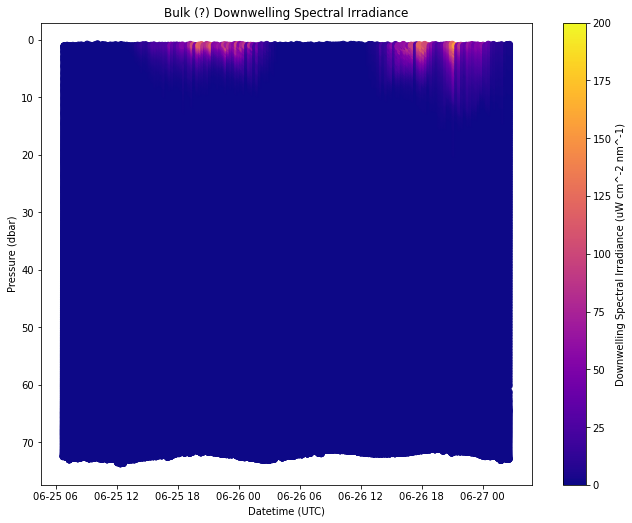

In [25]:
fig = plt.figure(figsize = (11,8.5))
p = plt.scatter(df.index,df.pressure,c = df.spkir_abj_cspp_downwelling_vector,cmap = 'plasma', vmin = 0, vmax = 200)
plt.gca().invert_yaxis()
plt.xlabel('Datetime (UTC)')
plt.ylabel('Pressure (dbar)')
cbar = plt.colorbar(p)
cbar.set_label('Downwelling Spectral Irradiance (uW cm^-2 nm^-1)')
plt.title('Bulk (?) Downwelling Spectral Irradiance')

### ACS Data

In [26]:
df = import_data(acs_files)

In [27]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df[(df.index >= pbdt) & (df.index <= pedt)]

C660 = df[df.wavelength_c == 662.3]
C660 = C660[['int_ctd_pressure','beam_attenuation']]

A650 = df[df.wavelength_a == 650.4]
A650 = A650[['int_ctd_pressure','optical_absorption']]

A676 = df[df.wavelength_a == 676.2]
A676 = A676[['int_ctd_pressure','optical_absorption']]

A715 = df[df.wavelength_a == 714.5]
A715 = A715[['int_ctd_pressure','optical_absorption']]

Text(0.5, 0, 'Datetime (UTC)')

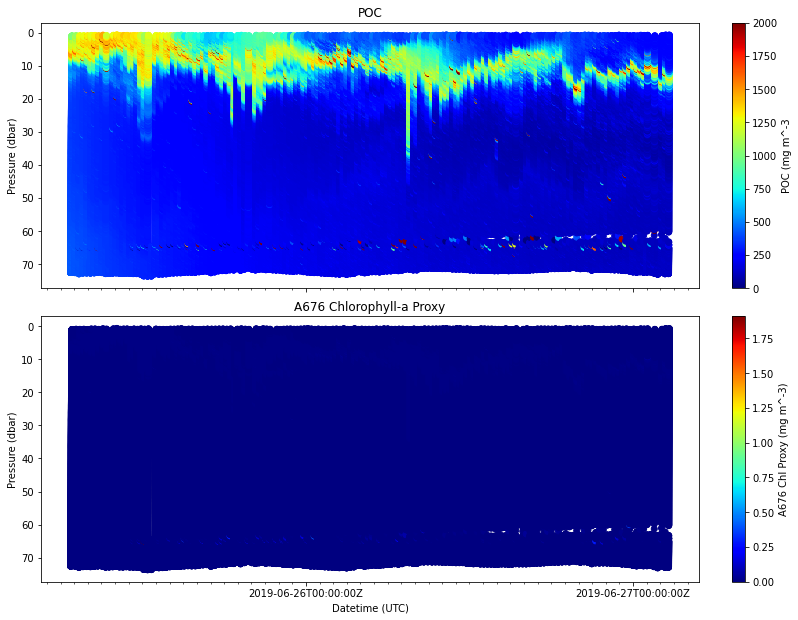

In [28]:
num_plots = 2
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True,sharex = True)
p1 = ax[0].scatter(C660.index,C660.int_ctd_pressure,c = C660.beam_attenuation*380,cmap = 'jet',vmin = 0,vmax = 2000)  #Global Relationship Gardner et al 2006.

p2 = ax[1].scatter(A676.index,A676.int_ctd_pressure,c = A676.optical_absorption*0.020 ,cmap = 'jet',vmin = 0)

for i in range(num_plots):
    ax[i].invert_yaxis()
    ax[i].set_ylabel('Pressure (dbar)')
    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

cbar1 = plt.colorbar(p1,ax=ax[0])
cbar2 = plt.colorbar(p2,ax=ax[1])
cbar1.set_label('POC (mg m^-3')
cbar2.set_label('A676 Chl Proxy (mg m^-3)')

ax[0].set_title('POC')
ax[1].set_title('A676 Chlorophyll-a Proxy')

ax[-1].set_xlabel('Datetime (UTC)')